<a href="https://colab.research.google.com/github/Dzukito/Patient-charges-/blob/main/Medicina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Leemos la data
data= pd.read_csv("insurance.csv")

In [5]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
#Valores nulos
print(pd.isnull(data).sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Hagamos encoding de las variables

In [10]:
sexdummy = pd.get_dummies(data.sex, prefix='Sex')
sexdummy

,Sex_female,Sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [11]:
datadf=pd.concat([data,sexdummy], axis=1)
datadf.head(2)

,age,sex,bmi,children,smoker,region,charges,Sex_female,Sex_male
0,19,female,27.90,0,yes,southwest,16884.9240,1,0
1,18,male,33.77,1,no,southeast,1725.5523,0,1


In [13]:
datadf.drop(["sex"], axis=1, inplace=True)
datadf.head(2)

KeyError: ignored

In [14]:
smokerdummy = pd.get_dummies(datadf.smoker, prefix='Smoker')
datadf= pd.concat([datadf,smokerdummy], axis=1)
datadf.drop(["smoker"], axis=1, inplace=True)

In [15]:
datadf.head(2)

,age,bmi,children,region,charges,Sex_female,Sex_male,Smoker_no,Smoker_yes
0,19,27.90,0,southwest,16884.9240,1,0,0,1
1,18,33.77,1,southeast,1725.5523,0,1,1,0


In [16]:
datadf["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
datadf["region"].replace(["southeast","southwest","northeast","northwest"],[0,1,2,3], inplace=True)
datadf.region.astype("int64")

0       1
1       0
2       0
3       3
4       3
       ..
1333    3
1334    2
1335    0
1336    1
1337    3
Name: region, Length: 1338, dtype: int64

In [18]:
datadf.region.astype("int64")

0       1
1       0
2       0
3       3
4       3
       ..
1333    3
1334    2
1335    0
1336    1
1337    3
Name: region, Length: 1338, dtype: int64

In [19]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   region      1338 non-null   int64  
 4   charges     1338 non-null   float64
 5   Sex_female  1338 non-null   uint8  
 6   Sex_male    1338 non-null   uint8  
 7   Smoker_no   1338 non-null   uint8  
 8   Smoker_yes  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB


# EDA

In [20]:
datadf.corr()['charges'].sort_values()

Smoker_no    -0.787251
Sex_female   -0.057292
region       -0.056993
Sex_male      0.057292
children      0.067998
bmi           0.198341
age           0.299008
Smoker_yes    0.787251
charges       1.000000
Name: charges, dtype: float64

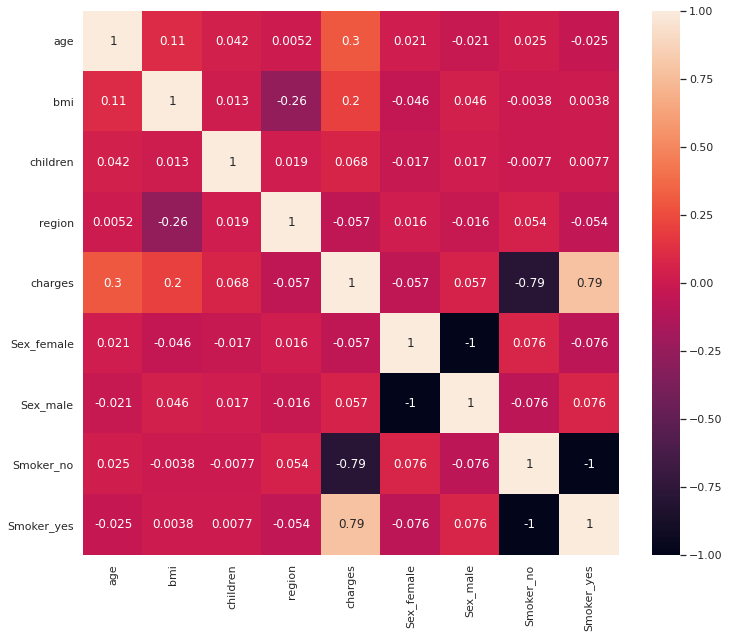

In [21]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(datadf.corr(), annot=True)

In [22]:
#Parece que ser fumador si afecta y es una correlacion fuerte
#Es por esto que hay que ir por este camino ahora. Preguntarnos cosas respecto a la variable Smoker

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


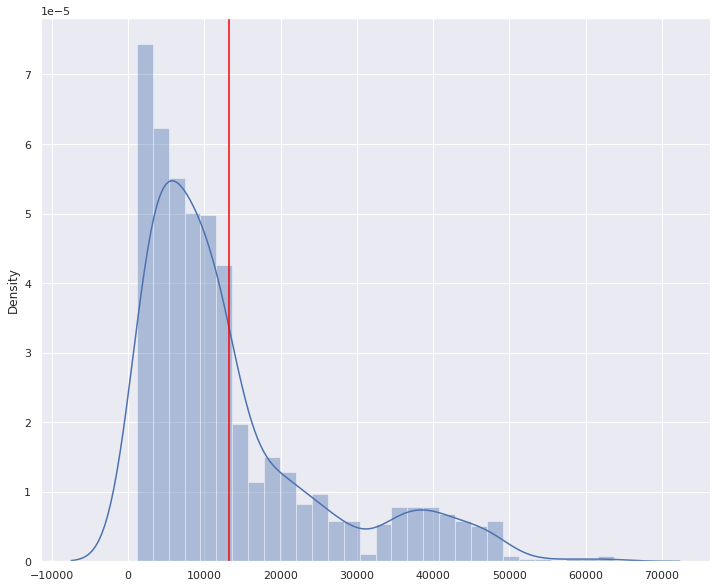

In [23]:
#Pero primero veamos la distrubucion de nuestra variable a predecir, asi tenemos mas informacion. Podemos usar un histograma 
sns.distplot(datadf.charges.values)
mean= datadf.charges.mean()
plt.axvline(mean,0,1,color="red")

In [24]:
#Obviamente, la mayoria de personas gastan en charges baratos y pocas en caros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for not-smokers')

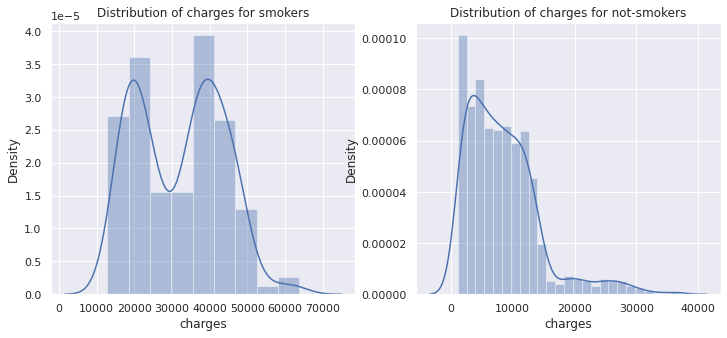

In [25]:
#Veamos un histograma de charges para los fumadores y no fumadores
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(datadf[datadf.Smoker_yes==1]["charges"])
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(datadf[datadf.Smoker_yes==0]["charges"])
ax.set_title('Distribution of charges for not-smokers')

In [26]:
#Para los fumadores vemos que gastan charges más caros (>30000) y que aparte muchos gastan en charges o bien baratos (como todo el mundo) o bien muy caros (grafico bimodal)
#Para los NO fumadores, se gasta en charges mucho mas baratos (sigue existiendo asimetria) 

0    1064
1     274
Name: Smoker_yes, dtype: int64


159

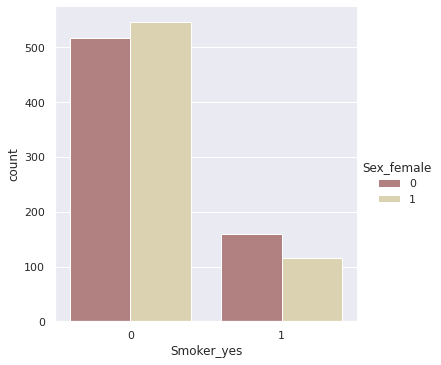

In [48]:
#Ahora veamos la cantidad de fumadores
sns.catplot(x="Smoker_yes", kind="count",hue = 'Sex_female', palette="pink", data=datadf)
print(datadf.Smoker_yes.value_counts())
datadf[(datadf.Sex_female==0) & (datadf.Smoker_yes==1)].shape[0]

In [49]:
#Podemos ver que tenemos mayoria de no fumadores, y de los fumadores tenemos que el 58% es hombre.
#!Se puede suponer que el costo del tratamiento en los hombres será mayor que en las mujeres, dado el impacto del tabaquismo.

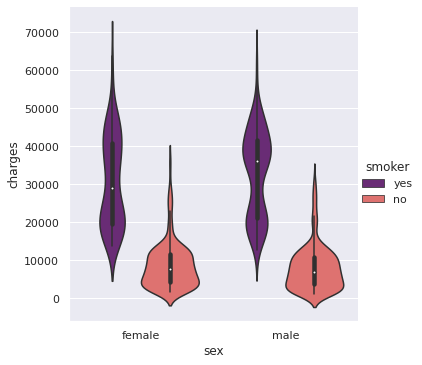

In [53]:
#Mas graficas explorando a los fumadores, pero ahora chusmeando su relacion con el sexo
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

In [54]:
#La grafica violin nos esta separando en 4 violines: los dos de la izquierda son para mujeres y
#los dos de la derecha son para hombres. 
#Se ve nuevamente que los fumadores abarcan unos rangos de costo mucho màs grandes 

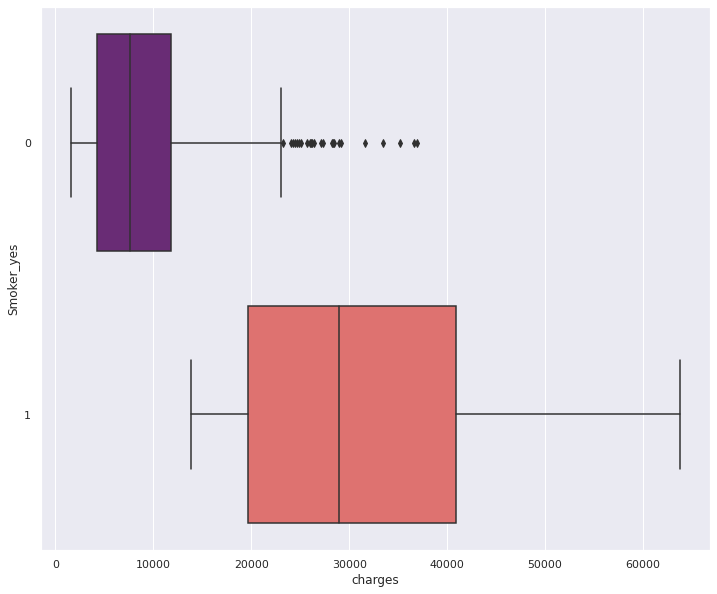

In [60]:
#Analicemos las mujeres
sns.boxplot(x="charges",y="Smoker_yes", data=datadf[(datadf.Sex_female==1)], orient="h", palette="magma")

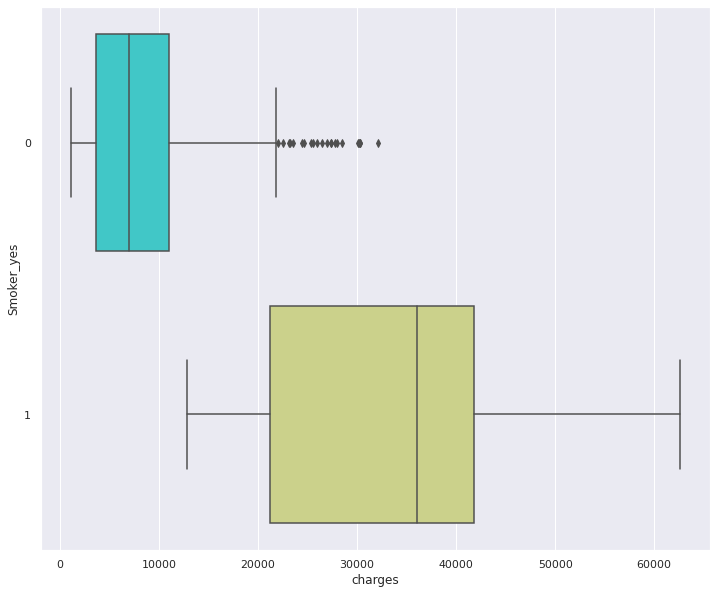

In [61]:
#Analicemos los hombres
sns.boxplot(x="charges",y="Smoker_yes", data=datadf[(datadf.Sex_female==0)], orient="h", palette="rainbow")

In [62]:
#Con estos graficos de arriba corroboramos tambien las hipotesis anteriores

In [ ]:
############################################################################

In [ ]:
#Ahora, EVALUEMOS LA SEGUNDA FEATURE INTERESANTE QUE CORRELACIONA CON CHARGES: LA EDAD

In [ ]:
#Primero veamos como se distribuye la edad


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


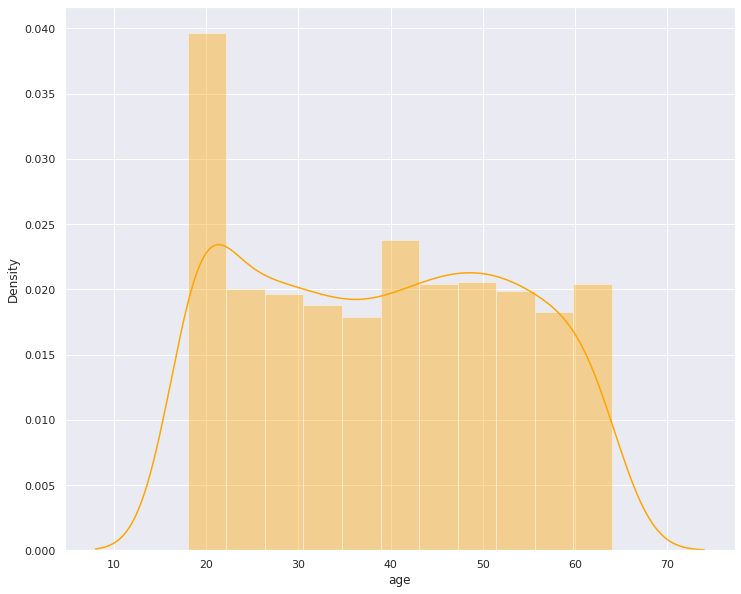

In [68]:
ax = sns.distplot(data["age"], color = 'orange')

In [69]:
#Como vemos, tenemos un monton de jovenes de entre 18 y 20 años

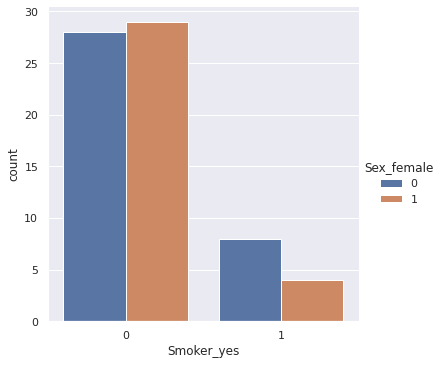

In [70]:
#Ahora me gustaría saber si hay jovenes (18) que fuman, asi relaciono las dos features mas corr.
sns.catplot(x="Smoker_yes",kind="count", hue="Sex_female", data=datadf[(data.age==18)])

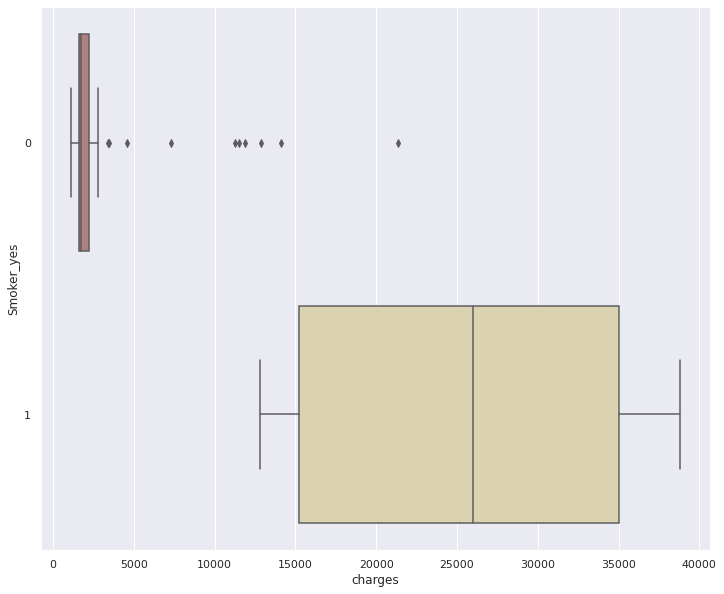

In [73]:
#si, hay fumadores jovenes. Veamos si fumar a esta edad afecta el costo del tratamiento
sns.boxplot(x="charges",y="Smoker_yes", data=datadf[(data.age==18)], orient="h", palette="pink")

In [74]:
#Oh wow, incluso los fumadores de 18 años gastan mucho mas en tratamiento que los no fumadores
#En los no fumadores, podemos ver outliers. ¿Que chico no fumador de 18 querria pagar un tratamiento caro?
#Bueno, algun chico con una enfermedad complicada o un accidente, eso explicaria los outliers...


In [75]:
#Otros analisis que se podrian hacer seria evaluar como afecta la edad del fumador en el tratamiento


In [76]:
#########################################################################################

In [77]:
#Ahora prestemos atención al BMI. A ver si afecta el peso al tratamiento y como es dicho peso

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


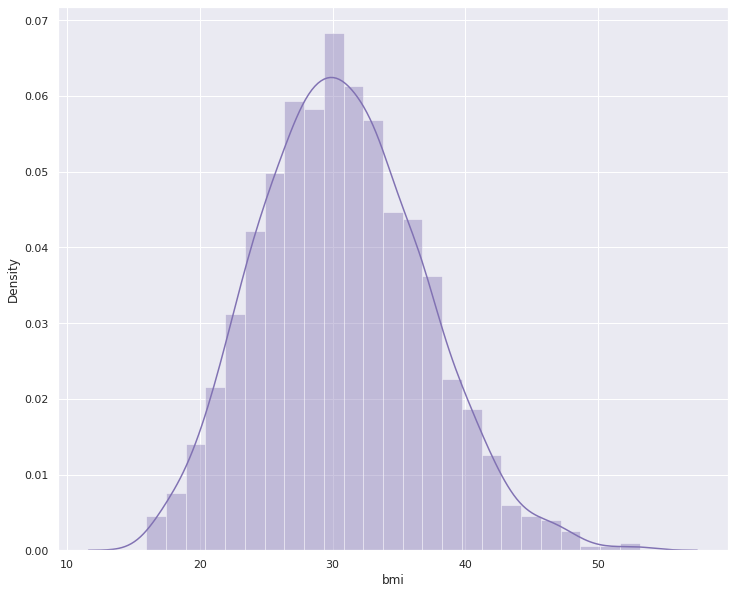

In [78]:
ax = sns.distplot(data["bmi"], color = 'm')

In [79]:
#Para entender esta grafica hay que entender el BMI. A partir de 30 empieza la OBESISDAD.
#Entonces podes echar un vistazo a los tratamientos de pacientes con <30 y >30 BMI

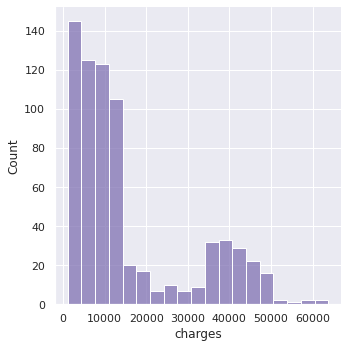

In [82]:
#Gente que es obesa
sns.displot(data[(data.bmi >= 30)]['charges'], color='m')

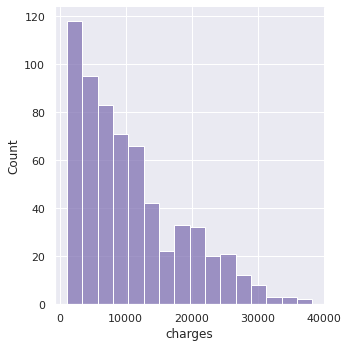

In [83]:
#Gente que esta en forma
sns.displot(data[(data.bmi < 30)]['charges'], color='m')

In [84]:
#La gente obesa gasta un monton en tratamiento!

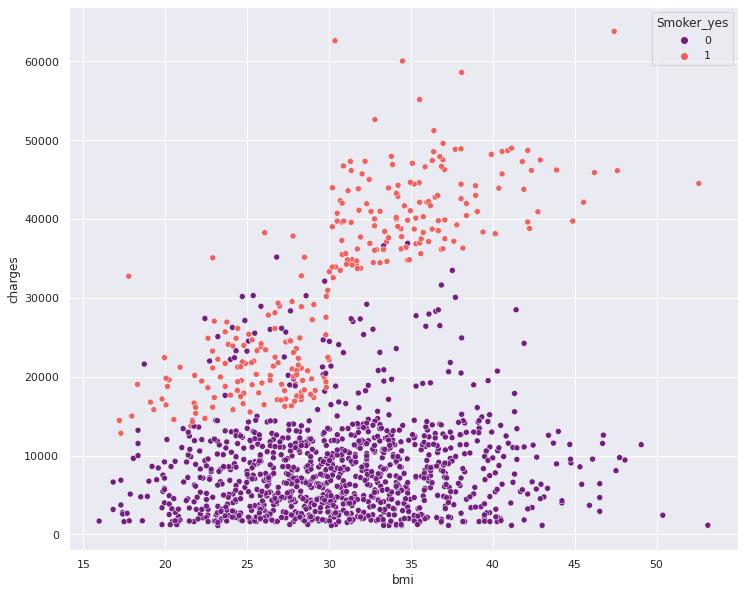

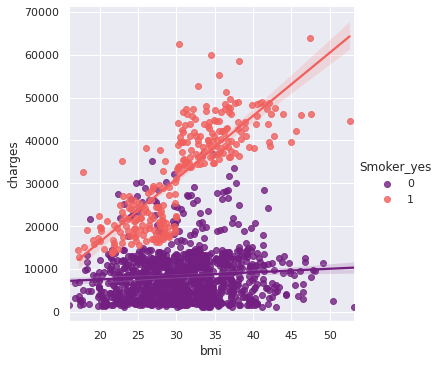

In [91]:
sns.scatterplot(x='bmi',y='charges',data=datadf,palette='magma',hue='Smoker_yes')
sns.lmplot(x='bmi',y='charges',data=datadf,palette='magma',hue='Smoker_yes')

In [90]:
#Esta grafica es interesante. Si sos fumador y gordo, pagas un montoooon
#Hay incluso relaciones lineales

In [92]:
##############################################################################################

In [93]:
#Ahora inestiguemos la proxima variable: los hijos

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


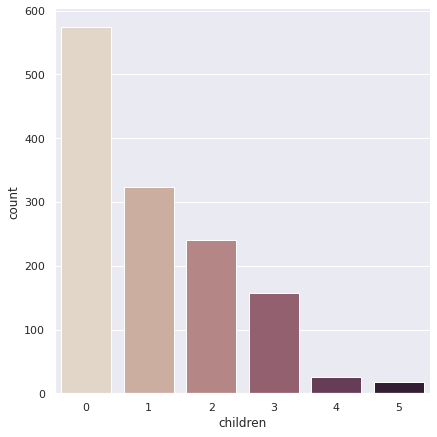

In [94]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=datadf, size = 6)

In [95]:
#La mayoría de los pacientes no tienen hijos.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


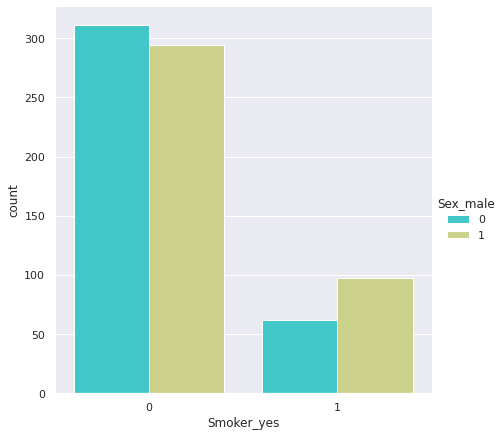

In [101]:
#La gente que tiene hijos, fuma?
sns.catplot(x="Smoker_yes", kind="count", palette="rainbow",hue = "Sex_male",
            data=datadf[(datadf.children > 0)], size = 6)

In [102]:
#Pues si... pero lo bueno es que la mayoria de quienes tiene hijos no fuman

In [103]:
#Listo por ahora, pasemos al ML

### ML

In [106]:
from sklearn.model_selection import train_test_split

seed=44


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [107]:
lr = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
kr = KernelRidge()
dt = DecisionTreeRegressor(random_state = seed)
svr = SVR()
knn = KNeighborsRegressor(n_jobs= -1)
pls = PLSRegression()
rf = RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(n_jobs = -1, random_state = seed)
lgb = LGBMRegressor(n_jobs = -1, random_state = seed)

In [110]:
X= datadf.drop(["charges"],axis=1)
Y= datadf.charges
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [113]:
'''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
def entrenar(model):
    model.fit(X_train, y_train)
    return (model.score(X_train, y_train),model.score(X_test, y_test))

#Entrenamos
models = [lr, lasso, ridge, elnt, kr, dt, svr, knn, pls, rf, et, ab, gb, xgb, lgb]
scores = []
for model in models:
    scores.append(entrenar(model))

[17:59:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [114]:
scores

[(0.7363010380001245, 0.8034148892707091),
 (0.7363009469464263, 0.8034116578806842),
 (0.7362955213739251, 0.8034188461156672),
 (0.5053896861512238, 0.5289514828190556),
 (0.7362955628412469, 0.8034074512736482),
 (0.9988240489632985, 0.790232969298923),
 (-0.10020802928522099, -0.13111985171583496),
 (0.4805463210444013, 0.1977480939785301),
 (0.7338877246204247, 0.8009910621704669),
 (0.9744998332840898, 0.8823058958767038),
 (0.9988240489632985, 0.8711207298412614),
 (0.8257152442206336, 0.8565205674073423),
 (0.8992954861734331, 0.9037756280394648),
 (0.8912715917033079, 0.9082400974363659),
 (0.9368381315642825, 0.8950366959879443)]

In [115]:
#Hay buenos resultados para XGB, GB,LGB